In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# Load data
data = pd.read_csv("datatset\heart_failure_clinical_records_dataset.csv")

In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# # Plot distribution of each feature
# plt.figure(figsize=(13, 10))
# for i, column in enumerate(data.columns):
#     plt.subplot(3, 4, i + 1)
#     sns.histplot(data[column], kde=True)
#     plt.title(column)
#     plt.xlabel('')
# plt.tight_layout()
# plt.show()

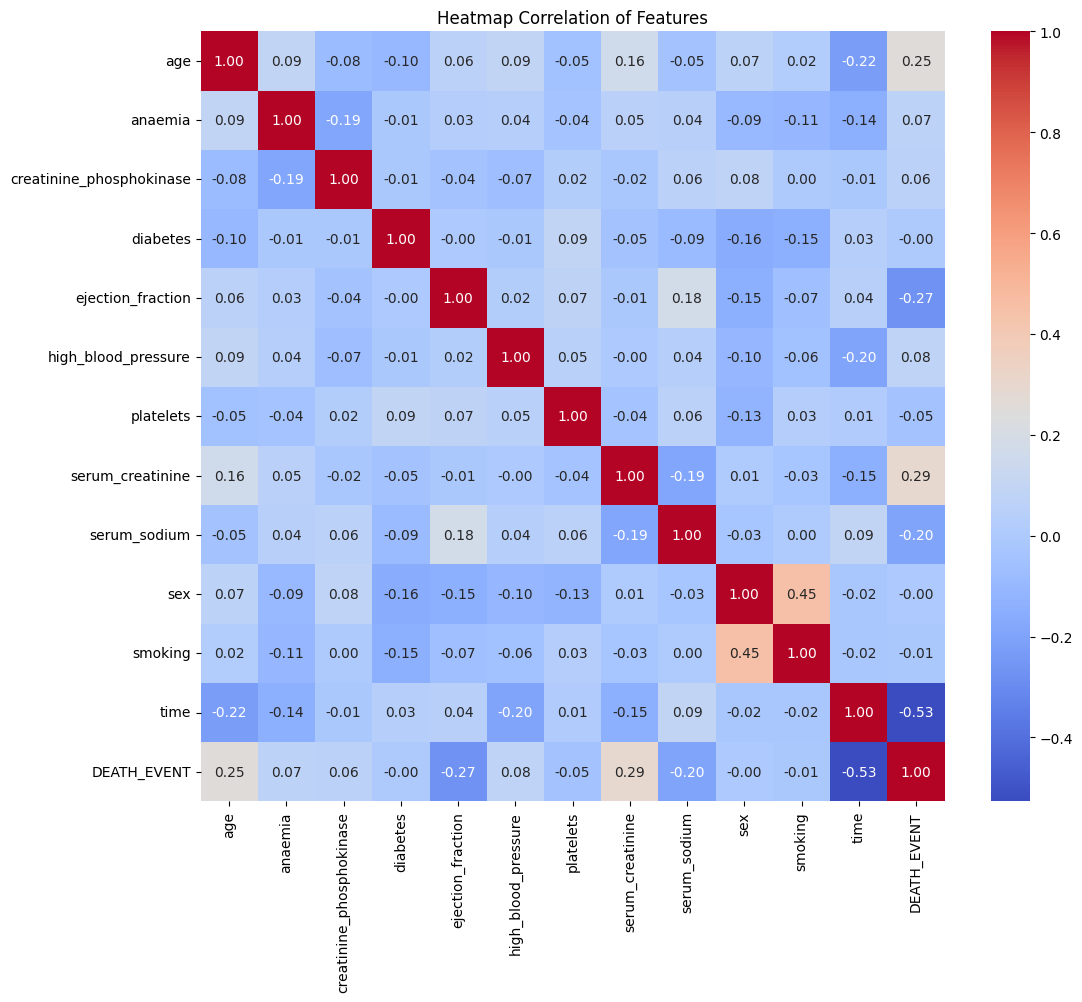

In [6]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation of Features')
plt.show()

In [7]:
# # Separate features and target
# X = data.drop('DEATH_EVENT', axis=1)  # Features
# y = data['DEATH_EVENT']  # Target

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define hyperparameters grid
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4, 5],
# }

# # Initialize SVM model
# svm_model = SVC()

# # Perform Grid Search
# grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Best model
# best_model = grid_search.best_estimator_

# # Predictions
# svm_preds = best_model.predict(X_test)

# # Accuracy
# svm_accuracy = accuracy_score(y_test, svm_preds)
# print("Best SVM Model Accuracy:", svm_accuracy)

In [8]:
# Separate features and target
X = data.drop('DEATH_EVENT', axis=1)  # Features
y = data['DEATH_EVENT']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_preds = svm_model.predict(X_test_scaled)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

